In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load a freely available dataset from scikit-learn
data = load_breast_cancer()  # features + target in memory [web:17]
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# Buildilng the Model
# create an instance of the RandomForestClassifier estimtor with random_state = 42 
# and oob_score = True and fit to X and Y

forest_1 = RandomForestClassifier(oob_score=True, random_state=42).fit(X, y)
forest_1.oob_score_

0.961335676625659

In [6]:
# Changing the number of trees
# n_trees list below define the different numbers of trees to use

n_trees = [1, 10, 100, 500, 1000, 2000]

oob_scores = []
for i in n_trees:
    forest = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=i).fit(X, y)
    oob_scores.append(forest.oob_score_)

oob_scores

[0.5834797891036907,
 0.9314586994727593,
 0.961335676625659,
 0.961335676625659,
 0.961335676625659,
 0.9648506151142355]

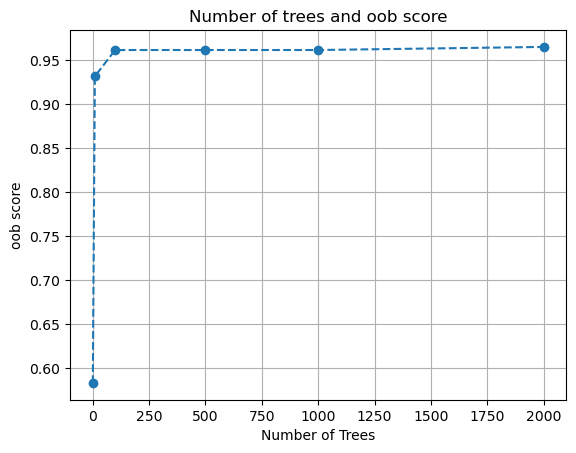

In [7]:
plt.plot(n_trees, oob_scores, '--o')
plt.grid()
plt.title('Number of trees and oob score')
plt.xlabel('Number of Trees')
plt.ylabel("oob score");

The RandomForestClassifier contains most of the same parameters as the DecisionTreeClassifier including max_depth and ccp_alpha that control the geometry of the individual trees.

While searching over many parameters of a forest might seem like a good idea, in this context it is too computationally complex to be exhaustive.

In [8]:
# Changing the trees themselves
# Comparing trees with 200 trees in the model, and explore if the depth of these trees effects 
# the out of bag score. 
# Use the list depths below, and use the list depth_oob to keep track of the scores.

depths = [1, 2, 3, 4, 5, None]

depth_oobs = []
for d in depths:
    forest = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=200,
                                   max_depth = d).fit(X, y)
    depth_oobs.append(forest.oob_score_)

depth_oobs

[0.9279437609841827,
 0.945518453427065,
 0.9507908611599297,
 0.9560632688927944,
 0.9560632688927944,
 0.9595782073813708]